# Stock Market Analysis

### Results?
#### We will try to answer the following questions after doing stock market data analysis:

How much did the stock price of each company change over time?

What were the daily returns for all the companies?

How are the stocks of the companies related to each other?

How much money do we risk losing by investing in a certain company?

Can we predict future stock behavior?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sys = pd.read_csv('Year_2018/SYS.csv')
print(sys.head())

          Time   Open  High    Low  Close  Volume
0  Jan 1, 2018  75.50  75.5  75.00  75.00    4000
1  Jan 2, 2018  74.85  76.0  73.11  75.32  197500
2  Jan 3, 2018  74.03  74.6  72.30  72.75   21000
3  Jan 4, 2018  71.03  74.5  71.03  74.01  381500
4  Jan 5, 2018  74.35  77.0  71.00  76.52  180500


In [2]:
sys['Time'] = pd.to_datetime(sys.Time)
sys.set_index('Time',inplace=True)
print(sys.head())

             Open  High    Low  Close  Volume
Time                                         
2018-01-01  75.50  75.5  75.00  75.00    4000
2018-01-02  74.85  76.0  73.11  75.32  197500
2018-01-03  74.03  74.6  72.30  72.75   21000
2018-01-04  71.03  74.5  71.03  74.01  381500
2018-01-05  74.35  77.0  71.00  76.52  180500


<AxesSubplot:xlabel='Time'>

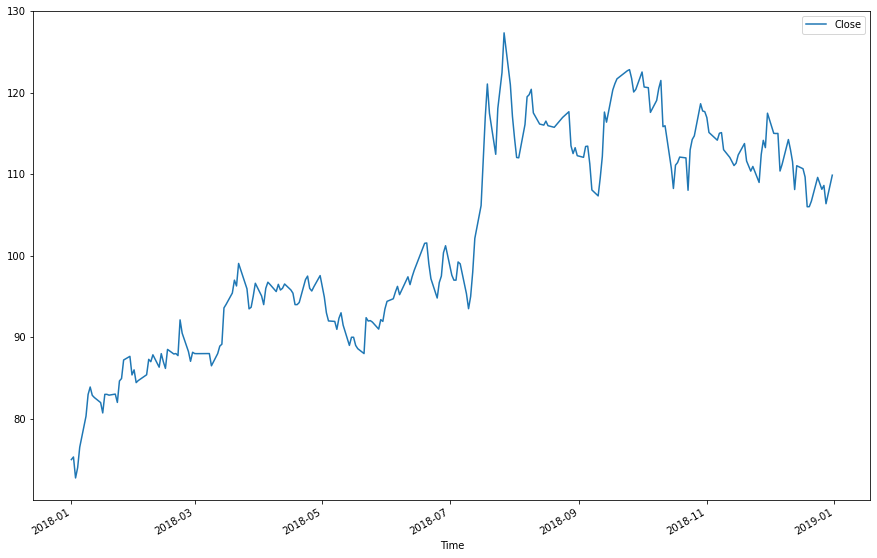

In [4]:
sys.Close.plot(legend=True,figsize=(15,10))